# Mini Project 2

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**


###  Hypothesis Testing of Standard Assumptions Theoretical Financial Mathematics

In the theory of mathematical finance, it is common to assume the log returns of a stock/index are normally distributed.


Investigate if the log returns of stocks or indexes of your choosing are normally distributed. Some suggestions for exploration include:

    1) Test if there are period of times when the log-returns of a stock/index have evidence of normal distribution.
    
    2) Test if removing extremal return data creates a distribution with evidence of being normal.
    
    3) Create a personalized portfolio of stocks with historical log return data that is normally distributed.
    
    4) Test if the portfolio you created in the first mini-project has significant periods of time with evidence of normally distributed log returns.
    
    5) Gather x-number of historical stock data and just perform a normality test on their log return data to see if any of the stocks exhibit evidence of log returns that are normally distributed.

In [6]:
# Package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import yfinance as yf
import datetime as dt
sns.set_style('darkgrid')

First we create a function for normality test.

In [ ]:
# Create a function to download stock data, compute log returns, apply D'Agostino and Pearson’s tests and create QQ plots
# This function is based on the notebook "Test for Normality Notebook.ipynb"

def normality_test(ticker, start_date, end_date):
    # Download data
    stock = yf.download(ticker, start=start_date, end=end_date, auto_adjust=True)
    
    # Compute log returns
    log_returns = np.log(stock['Close'] / stock['Close'].shift(1))[ticker].dropna().values

    p = stats.normaltest(log_returns)[1]
    print(f"{ticker} log return distribution: p-value = {p:.4f}")
    if p < 0.05:
        print("→ Statistically significant evidence that the data is NOT normally distributed.")
    else:
        print("→ No statistically significant evidence against normality.")

    # Plot QQ plot
    plt.figure(figsize=(10, 6))
    stats.probplot(log_returns, dist="norm", plot=plt)
    plt.title(f"{ticker} Log Returns Probability Plot", fontsize=16)
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel("Ordered Values")
    plt.grid(True)
    plt.show()

1) Test if there are period of times when the log-returns of a stock/index have evidence of normal distribution.
 
We choose 'XOM' with start time '2023-06-01' and end time '2024-06-01'. The normality test gives p-value of 0.4187, showing no statistically significant evidence against normality. See below for the code and visualization.

[*********************100%***********************]  1 of 1 completed

XOM log return distribution: p-value = 0.4187
→ No statistically significant evidence against normality.


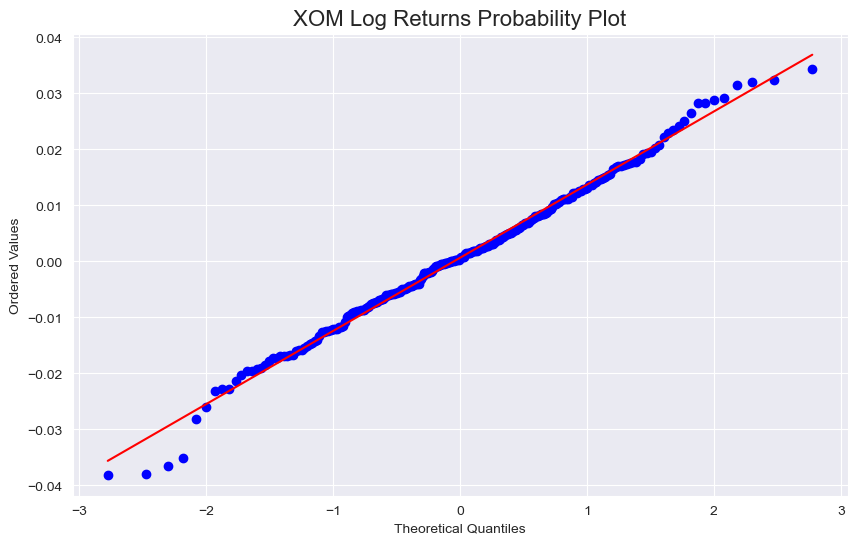

In [35]:
normality_test('XOM', '2023-06-01', '2024-06-01')

2) Test if removing extremal return data creates a distribution with evidence of being normal.

We choose start time '2024-06-01' and end time '2025-06-01' and perform normality test on log returns of the original data and truncated data. The truncation is done by cutting off 0.01 quantile and 0.99 quantile. From the results we see that after truncation several stocks have normality in log returns including AMZN, META, TSLA and JNJ.

In [50]:
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'META', 'TSLA', 'JNJ']
def get_log_returns(ticker, start_date, end_date):
    stock = yf.download(ticker, start=start_date, end=end_date, auto_adjust=True)
    log_returns = np.log(stock['Close'] / stock['Close'].shift(1))[ticker].dropna().values
    return log_returns

def trim_extremes_by_quantile(returns, lower_q=0.01, upper_q=0.99):
    lower = np.quantile(returns, lower_q)
    upper = np.quantile(returns, upper_q)
    return returns[(returns >= lower) & (returns <= upper)]

for ticker in tickers:
    log_returns = get_log_returns(ticker, '2024-06-01', '2025-06-01')
    p = stats.normaltest(log_returns)[1]
    print(f"{ticker} log return distribution: p-value = {p:.4f}")
    
    log_returns_trimmed = trim_extremes_by_quantile(log_returns)
    p_trimmed = stats.normaltest(log_returns_trimmed)[1]
    print(f"Truncated {ticker} log return distribution: p-value = {p_trimmed:.4f}")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

AAPL log return distribution: p-value = 0.0000
Truncated AAPL log return distribution: p-value = 0.0003
MSFT log return distribution: p-value = 0.0000
Truncated MSFT log return distribution: p-value = 0.0208
AMZN log return distribution: p-value = 0.0000
Truncated AMZN log return distribution: p-value = 0.3674
GOOGL log return distribution: p-value = 0.0000
Truncated GOOGL log return distribution: p-value = 0.0085
META log return distribution: p-value = 0.0000
Truncated META log return distribution: p-value = 0.1137
TSLA log return distribution: p-value = 0.0000
Truncated TSLA log return distribution: p-value = 0.8908
JNJ log return distribution: p-value = 0.0000
Truncated JNJ log return distribution: p-value = 0.9692


3) Create a personalized portfolio of stocks with historical log return data that is normally distributed.

We select XOM and S&P500 with equal weights, start time '2023-06-01' and end time '2024-06-01'. The normality test of the portfolio shows p-value 0.4182.

In [52]:
tickers = ['XOM', '^GSPC']
start_date = '2023-06-01'
end_date = '2024-06-01'

for ticker in tickers:
    log_returns = get_log_returns(ticker, start_date, end_date)
    p = stats.normaltest(log_returns)[1]
    print(f"{ticker} log return distribution: p-value = {p:.4f}")

portfolio_returns = np.mean([get_log_returns(ticker, start_date, end_date) for ticker in tickers], axis=0)
p_portfolio = stats.normaltest(portfolio_returns)[1]
print(f"Portfolio log return distribution: p-value = {p_portfolio:.4f}")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

XOM log return distribution: p-value = 0.4187
^GSPC log return distribution: p-value = 0.7574
Portfolio log return distribution: p-value = 0.4182


4) Test if the portfolio you created in the first mini-project has significant periods of time with evidence of normally distributed log returns.

For the Low-Risk Portfolio Stocks: ['VZ', 'MCD', 'PG', 'JNJ', 'KO'] created in the first mini-project, the normality test gives p-value 0f 0.7080 from 2024-06-01 to 2024-11-01.

In [61]:
tickers = ['VZ', 'MCD', 'PG', 'JNJ', 'KO']#['TSLA', 'INTC', 'NVDA', 'META', 'AMZN']
start_date = '2024-06-01'
end_date = '2024-11-01'

portfolio_returns = np.mean([get_log_returns(ticker, start_date, end_date) for ticker in tickers], axis=0)
p_portfolio = stats.normaltest(portfolio_returns)[1]
print(f"Portfolio log return distribution: p-value = {p_portfolio:.4f}")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Portfolio log return distribution: p-value = 0.7080
